# Students Distribution - Districts Analysis
This project examines if the distribution of students per school level is comparable to distribution at the district level. In other words, this project investigates if student diversity in a district is reflected in the diversity of each school.<br>
My motivation for this project was my observation that in my school district, the schools were not as diverse as the district as a whole.<br>
The resulting report grades each district on its effort to make each school's student body as close to the district's student body. <br><br>
This project is just one of many projects I completed using this dataset.


## Data
For this analysis I used a publicly available dataset. Also, I created additional variables (data engineering).<br>
The dataset can be downloaded from:<br>
* __[Illinois Schools Datasets](https://www.isbe.net/ilreportcarddata
)__

Because of the COVID-19 pandemic, I used the latest available dataset from 2019.

The dataset is extremely large and it contains thousands of variables for each school and district.
For my analysis, I am going to use only a tiny subset of variables.


## Data Preprocessing
Before I could start any analysis, I had to perform preprocessing of the dataset so the dataset could be utilized in the Python analysis.<br>
**Some of the preprocessing of the data is done in SQL.**<br><br>
The following preprocessing steps were employed:<br>
* Since I analyzed districts by the diversity of students in schools, I removed districts with less than 3 elementary schools.
* From the entire dataset, I removed all records that are not District or Elementary school records. Rows removed are for high, middle, and Pre-K schools.
* Since I am analyzing schools according to their diversity, I removed schools with a clear majority of one student group. This would remove schools and districts such as those in rural areas where the majority of students are white.




## Dataset Variables
To create a dataset that could be used to analyze districts and their schools, I created new variables for each school and district.
* For each row, I added new variables: % of White, Black, Hispanic, and Asian students for the district. Therefore, each row corresponding to a school has two sets of variables for the percentage distribution of students: one for the school and the other for the district.
* I removed variables that would not be used for processing.
* I renamed all the variables so their names clearly indicate their values.



#### SQL code for removing districts where the majority of students are from one group **


drop table [SchoolsAndDistrictsNewMajor]<br>
with t(dMajor)<br>
as<br>
(<br>
	select [District]<br>
	from [SchoolsAndDistrictsNew]<br>
	where [Type] = 'District'<br>
	and (<br>
	PERC_Student_Enrollment___White < 75<br>
	AND PERC_Student_Enrollment___Black_or_African_American < 75<br>
	AND PERC_Student_Enrollment___Hispanic_or_Latino < 75<br>
	AND PERC_Student_Enrollment___Asian < 75<br>
	AND PERC_Student_Enrollment___Two_or_More_Races < 75<br>
	)<br>
)<br>
select *<br>
into [SchoolsAndDistrictsNewMajor]<br>
from [SchoolsAndDistrictsNew] s, t<br>
where t.dMajor = s.[District]<br>


#### SQL code for adding district base percentage of student distribution to each school


with t(dd, dw, db, dh, da, dt)<br>
as<br>
(<br>
select District, PERC_Student_Enrollment___White,<br>
	 PERC_Student_Enrollment___Black_or_African_American,<br>
	PERC_Student_Enrollment___Hispanic_or_Latino,<br>
	PERC_Student_Enrollment___Asian ,<br>
	PERC_Student_Enrollment___Two_or_More_Races <br>
from [SchoolsAndDistrictsNewMajor]<br>
where [Type] = 'District'<br>
)<br>
select * <br>
into [dbo].[SchoolsAndDistrictsTotal]<br>
from [SchoolsAndDistrictsNewMajor] m, t tt<br>
where m.District = tt.dd<br>


### Python code dataset preprocessing

#### Create new dataset with relevant variables


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.cm as cm

df = pd.read_csv("..\\DataSets\\Districts\\dfNewColGeneral.csv",encoding='cp1252')
colToKeep = ['RCDTS','Type','School_Name','District','District_Size','School_Type',
'NR_Student_Enrollment',
'PERC_Student_Enrollment___White',
'PERC_Student_Enrollment___Black_or_African_American'
,'PERC_Student_Enrollment___Hispanic_or_Latino',
'PERC_Student_Enrollment___Asian',
'PERC_Student_Enrollment___Two_or_More_Races',
'PERC_Student_Enrollment___Children_with_Disabilities',
'PERC_Student_Enrollment___EL',
'PERC_Student_Enrollment___Low_Income']
dfC =  df[colToKeep]
dfC.head(7)
dfFilter = dfC.loc[(  (dfC['Type'] == 'School') & (dfC['School_Type'] == 'ELEMENTARY')  )\
                   | (dfC['Type'] == 'District')\
                       ]    

In [3]:
dfC.head(7)

,RCDTS,Type,School_Name,District,District_Size,School_Type,NR_Student_Enrollment,PERC_Student_Enrollment___White,PERC_Student_Enrollment___Black_or_African_American,PERC_Student_Enrollment___Hispanic_or_Latino,PERC_Student_Enrollment___Asian,PERC_Student_Enrollment___Two_or_More_Races,PERC_Student_Enrollment___Children_with_Disabilities,PERC_Student_Enrollment___EL,PERC_Student_Enrollment___Low_Income
0,010010010260001,School,Seymour High School,Payson CUSD 1,MEDIUM,HIGH SCHOOL,239,95.4,NaN,0.4,0.8,3.3,16.7,1.7,46.4
1,010010010262002,School,Seymour Elementary School,Payson CUSD 1,MEDIUM,ELEMENTARY,316,94.6,0.3,NaN,0.3,4.7,19.6,0.3,51.9
2,010010020260001,School,Liberty High School,Liberty CUSD 2,MEDIUM,HIGH SCHOOL,288,97.6,0.3,NaN,NaN,2.1,25.3,NaN,20.5
3,010010020262002,School,Liberty Elementary School,Liberty CUSD 2,MEDIUM,ELEMENTARY,350,97.4,0.3,NaN,NaN,2.3,18.6,NaN,25.1
4,010010030260001,School,Central High School,Central CUSD 3,MEDIUM,HIGH SCHOOL,237,98.3,NaN,NaN,NaN,1.7,21.1,NaN,42.2
5,010010030261001,School,Central Junior High School,Central CUSD 3,MEDIUM,MIDDLE SCHL,281,97.2,0.4,NaN,NaN,2.5,20.3,NaN,43.8
6,010010030262003,School,Central Elementary Grade School,Central CUSD 3,MEDIUM,ELEMENTARY,195,96.4,1.0,NaN,NaN,2.1,24.6,NaN,42.6


#### Reading the dataset that was preprocessed with SQL. Variable management: removing and renaming <BR>

In [4]:
df = pd.read_csv("..\\DataSets\\Districts\\SchoolsAndDistrictsTotal.csv")
df.columns
# columns raneme
new_df=df.rename(columns={\
'RCDTS':'RCDTS','Type':'Type','School_Name':'School_Name',\
'District':'District','District_Type':'District_Type',\
'School_Type':'School_Type',\
'NR_Student_Enrollment':'NR_Student',\
'PERC_Student_Enrollment___White':'PERC_White',\
'PERC_Student_Enrollment___Black_or_African_American':'PERC_Black',\
'PERC_Student_Enrollment___Hispanic_or_Latino':'PERC_Hisp',\
'PERC_Student_Enrollment___Asian':'PERC_Asian',\
'PERC_Student_Enrollment___Two_or_More_Races':'PERC_MultiRace',\
'PERC_Student_Enrollment___EL':'PERC_EL',\
'PERC_Student_Enrollment___Low_Income':'PERC_Low_Income',\
'dw':'PERC_White_Dist',\
    'db':'PERC_Black_Dist',\
        'dh':'PERC_Hisp_Dist',\
            'da':'PERC_Asian_Dist',\
                'dt':'PERC_MultiRace_Dist',\
})

# drop not needed columns
new_df.drop(['PERC_EL', 'PERC_Low_Income', 'd', 'dMajor', 'dd'], axis = 1, inplace=True)
# replace nan with 0
new_df = new_df.replace(np.nan, 0)


#### Creating new variables that are used in districts students distribution analysis

In [5]:

# calculate difference
new_df['White_Diff'] = new_df['PERC_White_Dist'] - new_df['PERC_White']
new_df['Black_Diff'] = new_df['PERC_Black_Dist'] - new_df['PERC_Black']
new_df['Hisp_Diff'] = new_df['PERC_Hisp_Dist'] - new_df['PERC_Hisp']
new_df['Asian_Diff'] = new_df['PERC_Asian_Dist'] - new_df['PERC_Asian']
new_df['MultiRace_Diff'] = new_df['PERC_MultiRace_Dist'] - new_df['PERC_MultiRace']

new_df['Diff_Total'] = new_df['White_Diff'].abs() + new_df['Black_Diff'].abs() + \
    new_df['Hisp_Diff'].abs() + new_df['Asian_Diff'].abs() + new_df['MultiRace_Diff'].abs()
new_df['Diff_Total'] = new_df['Diff_Total'] / new_df['cn']

new_df['Diff_Total_PerSchool'] = new_df['Diff_Total'] / new_df['cn']
new_dfS = new_df[new_df.Type == 'School']


#### Final dataset

In [7]:
new_df.head(7)

,RCDTS,Type,School_Name,District,District_Size,School_Type,NR_Student,PERC_White,PERC_Black,PERC_Hisp,...,PERC_Hisp_Dist,PERC_Asian_Dist,PERC_MultiRace_Dist,White_Diff,Black_Diff,Hisp_Diff,Asian_Diff,MultiRace_Diff,Diff_Total,Diff_Total_PerSchool
0,410570110262030,School,North Elementary School,Alton CUSD 11,LARGE,ELEMENTARY,559.0,50.8,35.8,2.0,...,3.0,0.6,10.6,4.0,-5.0,1.0,0.2,-0.3,1.500000,0.214286
1,410570110260000,District,0,Alton CUSD 11,LARGE,0,6218.0,54.8,30.8,3.0,...,3.0,0.6,10.6,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,410570110262007,School,Eunice Smith Elem School,Alton CUSD 11,LARGE,ELEMENTARY,195.0,46.2,39.0,4.1,...,3.0,0.6,10.6,8.6,-8.2,-1.1,-0.9,1.4,2.885714,0.412245
3,410570110262010,School,Gilson Brown Elem School,Alton CUSD 11,LARGE,ELEMENTARY,224.0,50.0,35.3,2.7,...,3.0,0.6,10.6,4.8,-4.5,0.3,0.2,-1.0,1.542857,0.220408
4,410570110262015,School,Lewis & Clark Elem School,Alton CUSD 11,LARGE,ELEMENTARY,295.0,51.9,35.6,3.1,...,3.0,0.6,10.6,2.9,-4.8,-0.1,0.6,1.1,1.357143,0.193878
5,410570110262024,School,Lovejoy Elem School,Alton CUSD 11,LARGE,ELEMENTARY,246.0,52.4,32.5,1.6,...,3.0,0.6,10.6,2.4,-1.7,1.4,0.6,-2.8,1.271429,0.181633
6,410570110262028,School,West Elementary School,Alton CUSD 11,LARGE,ELEMENTARY,543.0,54.5,27.6,5.0,...,3.0,0.6,10.6,0.3,3.2,-2.0,0.0,-1.2,0.957143,0.136735


#### Columns definitions in the final dataset
Asian_Diff - Difference (%) between school and district for Asian students
* Black_Diff - Difference (%) between school and district for Black students
* Diff_Total - Sum of all differences (%) for school.
* Diff_Total_PerSchool - Diff_Total divided by number of schools in district
* District - District Name
* Hisp_Diff - Difference (%) between school and district for Hispanic students
* MultiRace_Diff - Difference (%) between school and district for more than 1 race students
* NR_Student - Total number of students in School/District
* PERC_Asian - % of Asian Student (School Level)
* PERC_Asian_Dist - % of Asian Student (District Level)
* PERC_Black - % of Black Student (School Level)
* PERC_Black_Dist - % of Black Student (District Level)
* PERC_Hisp - % of Hispanic Student (School Level)
* PERC_Hisp_Dist - % of Hispanic Student (District Level)
* PERC_MultiRace - % of more than 1 race Student (School Level)
* PERC_MultiRace_Dist - % of more than 1 race Student (District Level)
* PERC_White - % of White Student (School Level)
* PERC_White_Dist - % of White Student (District Level)
* RCDTS - School/District distinct ID
* School_Name - School/District Name
* School_Type - School/District Name
* Type - School/District Name
* White_Diff - 
* cn - number of schools in district


## Analysis


#### General Distribution of students by School and District<br>
#### Note that I removed districts where the majority (75%) were from one student group.


<IPython.core.display.Javascript object>


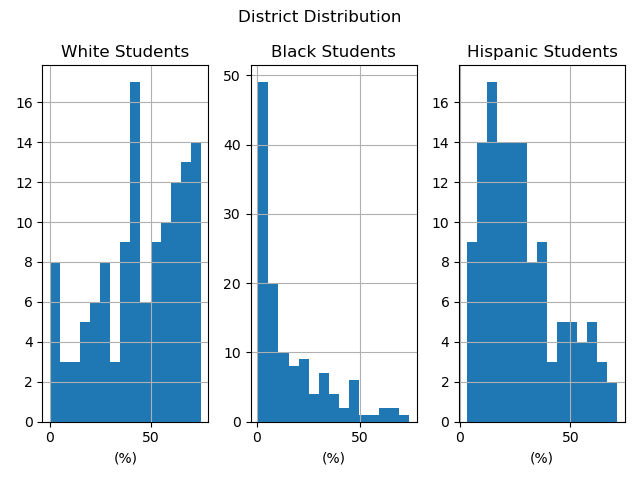

In [11]:
plt.figure()
plt.suptitle('District Distribution')
ax1 = plt.subplot(1, 3, 1)
new_df[new_df.Type == 'District']['PERC_White'].hist(bins=15)   
plt.title('White Students')
plt.xlabel('(%)')
ax2 = plt.subplot(1, 3, 2)
new_df[new_df.Type == 'District']['PERC_Black'].hist(bins=15)   
plt.title('Black Students')
plt.xlabel('(%)')
ax3 = plt.subplot(1, 3, 3)
new_df[new_df.Type == 'District']['PERC_Hisp'].hist(bins=15)   
plt.title('Hispanic Students')
plt.xlabel('(%)')
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


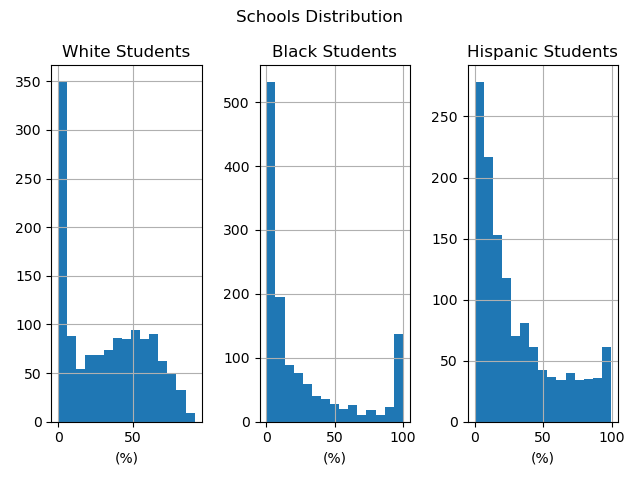

In [13]:

plt.figure()
plt.suptitle('Schools Distribution')
ax1 = plt.subplot(1, 3, 1)
new_df[new_df.Type == 'School']['PERC_White'].hist(bins=15)   
plt.title('White Students')
plt.xlabel('(%)')
ax2 = plt.subplot(1, 3, 2)
new_df[new_df.Type == 'School']['PERC_Black'].hist(bins=15)   
plt.title('Black Students')
plt.xlabel('(%)')
ax3 = plt.subplot(1, 3, 3)
new_df[new_df.Type == 'School']['PERC_Hisp'].hist(bins=15)   
plt.title('Hispanic Students')
plt.xlabel('(%)')
plt.tight_layout()
plt.show()


#### Distribution analysis of students by district and by schools
Based on the above histograms, we can make the following observations:<br>
<b>Note that districts with little diversity of students were removed<\b>
* From both graphs, I noticed that Hispanic students are well distributed. It shows that there are fewer schools with a Hispanic majority.<br>Still, there is a spike at 100, showing that there is a noticeable number of schools with 100% Hispanic students.
* Another interesting observation is that for white students, we have a majority of schools with close to 0%, while this does not correspond to district-based distribution for white students. This would suggest that even for a diverse district, there are a lot of schools with a very small percentage of white students.



#### Analysis of differences in student distribution between school and district.

<IPython.core.display.Javascript object>


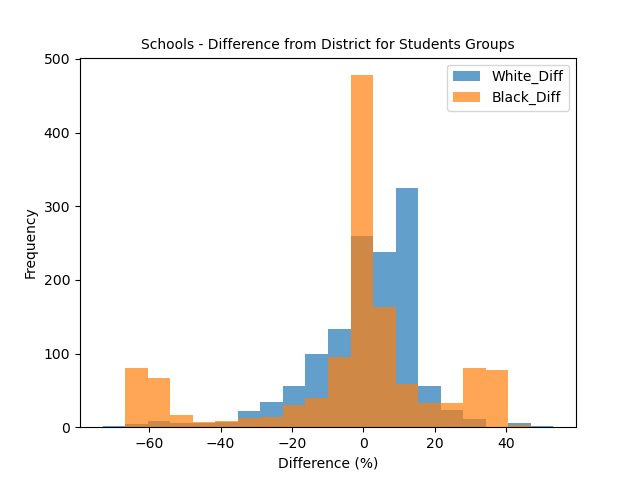

Text(0.5, 1.0, 'Schools - Difference from District for Students Groups')

In [8]:
new_dfS[['White_Diff', 'Black_Diff']].plot.hist(bins=20, alpha=0.7)
plt.xlabel('Difference (%)')
plt.ylabel('Frequency')
plt.title('Schools - Difference from District for Students Groups', fontsize='10')

<IPython.core.display.Javascript object>


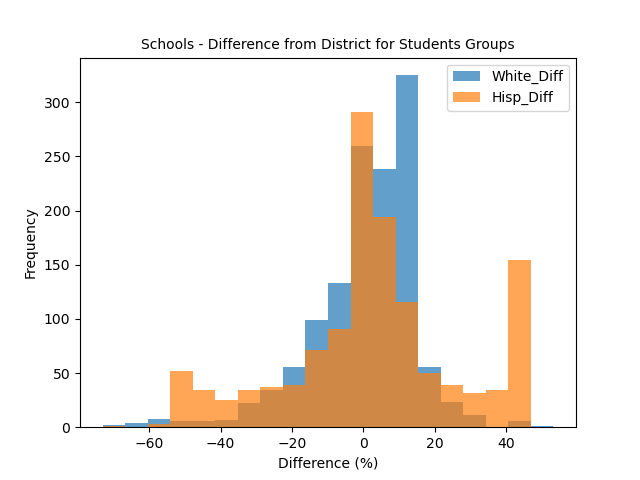

Text(0.5, 1.0, 'Schools - Difference from District for Students Groups')

In [9]:
new_dfS[['White_Diff', 'Hisp_Diff']].plot.hist(bins=20, alpha=0.7)
plt.xlabel('Difference (%)')
plt.ylabel('Frequency')
plt.title('Schools - Difference from District for Students Groups', fontsize='10')


* The difference of distribution for white students is skewed to higher percentages. It means that in diverse districts, individual schools tend to have a higher percentage of white students.<br><b>Still, the distribution is centered without outliers</b></b>.
* For Hispanic students, the distribution shows very high values for outliers with positive and negative values for differences. This shows that diverse districts tend to have schools with much higher or much lower numbers of Hispanic students as compared to the district composition.
* I noticed that the distribution for black students is similar to Hispanic students. While the outliers are clearly visible, they are not as frequent as for Hispanic students.




## Quantitative analysis of districts’ schools diversity.
I already have an indicator for each school (variable Diff_Total) of how the school diversity differs from the diversity of the district the school belongs to (variable Diff_Total). <br><br>Therefore, the best measure of how each district distributes its students is calculating standard deviation of Diff_Total per each district.

In [14]:
new_dfS = new_df[new_df.Type == 'School']
dfResults = new_dfS.groupby("District").agg({"Diff_Total":(np.nanstd)})
df

#### Below is a list of schools in the top 10 districts with the highest standard deviation of school diversity as compared to the diversity of the district.


In [16]:
new_dfS = new_df[new_df.Type == 'School']
dfResults = new_dfS.groupby("District").agg({"Diff_Total":(np.nanstd)}).sort_values(by=['Diff_Total']).reset_index()
#dfResults.sort_values(by=['Diff_Total'], inplace=True)
dfResultsDesc = new_dfS.groupby("District").agg({"Diff_Total":(np.nanstd)}).sort_values(by=['Diff_Total'], ascending=False).reset_index()
dfWorstDist = new_dfS[new_dfS.District.isin(dfResultsDesc.District.head(10)) ]
dfWorstDist.columns
colToKeepDist = ['School_Name', 'District','PERC_White', 'PERC_Black', 'PERC_Hisp', 'PERC_Asian']
dfWorstDistShort = dfWorstDist[colToKeepDist]

In [17]:
dfWorstDistShort

,School_Name,District,PERC_White,PERC_Black,PERC_Hisp,PERC_Asian
46,Childs Elem School,Posen-Robbins ESD 143-5,1.4,75.2,17.2,4.8
47,Posen Elem School,Posen-Robbins ESD 143-5,2.8,32.9,59.8,1.9
48,Turner Elem School,Posen-Robbins ESD 143-5,2.0,29.3,67.3,1.3
49,Gordon School,Posen-Robbins ESD 143-5,3.1,19.9,75.8,0.3
81,Hawthorn Sch of Dual Language,Hawthorn CCSD 73,31.2,0.2,64.1,2.0
83,Hawthorn Middle School North,Hawthorn CCSD 73,47.3,2.3,24.7,18.9
84,Hawthorn Elem School North,Hawthorn CCSD 73,49.7,1.8,26.5,17.1
85,Hawthorn Elem School South,Hawthorn CCSD 73,31.8,2.5,15.6,46.4
86,Hawthorn Townline Elem Sch,Hawthorn CCSD 73,46.8,3.8,8.6,36.1
87,Hawthorn Aspen Elem School,Hawthorn CCSD 73,58.7,1.9,17.2,16.0


#### To illustrate the lack of diversity on a school level, below is a graph with 5 (out of 9) schools for one of the worst-performing districts.


<IPython.core.display.Javascript object>


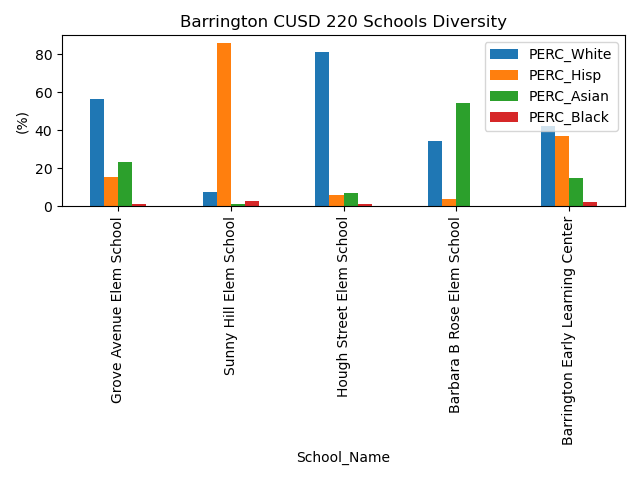

In [23]:
ind_list = [595,596, 597, 602,603]
dfWorstDistShort.loc[ind_list]

dfWorstDistShort.loc[ind_list].plot(x='School_Name', y=['PERC_White','PERC_Hisp','PERC_Asian','PERC_Black'], kind="bar")
plt.title('Barrington CUSD 220 Schools Diversity')
plt.ylabel('(%)')
plt.tight_layout()
plt.show()


## Conclusion
The main purpose of this analysis was to find a good measure that would quantify the distribution of students of different ethnicities for districts so that school diversity is as close as possible to district diversity.<br><br>
As seen in the above figure (Barrington School District) and other figures, there are a large number of districts where the distribution of students per school does not reflect the district’s distribution.<br><br>
I also showed that even if a district is diverse, schools tend to be dominated by one ethnicity. This could be easily explained by the fact that the schools' students are based on school areas, and families from the same ethnicities tend to live close to each other.
